In [16]:
# Importing libraries neeeded for the project
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

import warnings

In [17]:
#!/usr/bin/env /Applications/MAMP/Library/bin/python

import mysql.connector

config = {
  'user': 'root',
  'password': 'root',
  'host': '127.0.0.1',
  'port': 8889,
  'database': 'ecotourisme',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(dictionary=True)

cursor.execute('SELECT * FROM `ecologie` where id_pays = "US"')
results = cursor.fetchall()
cnx.close()

data1 = pd.DataFrame(results)

data = data1
# afficher  par ordre decroissant annee
data = data.sort_values(by='annee', ascending=True) 
data.head()


,id,id_pays,annee,co2,ges,elecRenew,GES_hab
0,198,US,1990,4844517.4,5855541.470,10.917163,23.7677
1,409,US,1991,4807496.5,5810376.768,10.741865,23.5844
2,620,US,1992,4879626.1,5894661.485,9.729862,23.9265
3,831,US,1993,4995209.5,6006008.717,10.270782,24.3784
4,1042,US,1994,5066803.0,6100512.901,9.532383,24.7620


In [18]:
data = data.set_index('annee')
series = data[['elecRenew']]

MISE EN PLACE DES PREDISCTIONS SANS ECHANTILLION

In [19]:
X = series.values

In [20]:
# pour avoir les tendance entre k et k+1 
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
		warnings.filterwarnings("ignore")
	return numpy.array(diff)

# pour transformer les prédictions faite sur la série transformer en valeur réel
def inverse_difference(history, prediction, interval=1):
 return prediction + history[-interval]

differenced = difference(X)

# faire apprendre le modele 
model = ARIMA(differenced, order=(10,2,1))
model_fit = model.fit()


In [21]:
# utilisation de forecast pour faire les prédiction
forecast = model_fit.forecast(steps=7)
print(forecast)

# inverse les prédictions faite pour avoir les valeurs réelles 
history = [x for x in X] # crée une copie de la série originale X 
annee = 1
for prediction in forecast:
	inverted = inverse_difference(history, prediction)
	print('Année %d: %f' % (annee, inverted))
	history.append(inverted)
	annee += 1


[  10940.09203171  -12496.90052813 -290114.38200899  -77943.20448239
  -68878.77833823 -198286.40132127 -110966.65685208]
Année 1: 4331472.592032
Année 2: 4318975.691504
Année 3: 4028861.309495
Année 4: 3950918.105012
Année 5: 3882039.326674
Année 6: 3683752.925353
Année 7: 3572786.268501


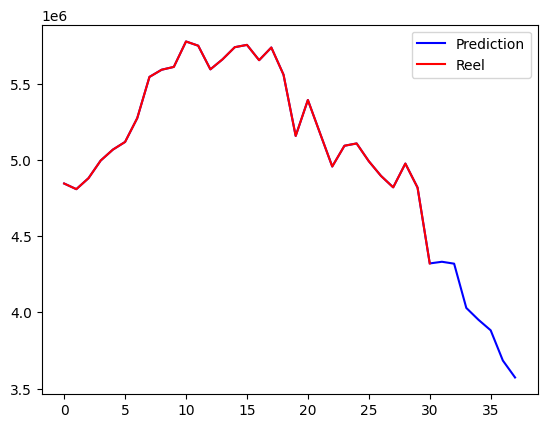

In [22]:
pyplot.plot(history, color='blue')
pyplot.plot(X, color='red')
pyplot.legend(['Prediction', 'Reel'])
pyplot.show()